# Example 1

In [1]:
import numpy as np
import torch
from torch.autograd import Variable

In [2]:
def get_data():
    train_X = np.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                          7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
    train_Y = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                          2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])
    dtype = torch.FloatTensor
    X = Variable(torch.from_numpy(train_X).type(dtype), requires_grad=False).view(17, 1)
    y = Variable(torch.from_numpy(train_Y).type(dtype), requires_grad=False)
    return X, y

def get_weights():
    w = Variable(torch.randn(1), requires_grad=True)
    b = Variable(torch.randn(1), requires_grad=True)
    return w, b

def simple_network(x):
    y_pred = torch.matmul(x, w)+b
    return y_pred

def loss_fn(y, y_pred):
    loss = (y_pred-y).pow(2).sum()
    for param in [w, b]:
        if not param.grad is None: param.grad.data.zero_()
    loss.backward()
    return loss

def optimize(learning_rate):
    w.data -= learning_rate * w.grad.data
    b.data -= learning_rate * b.grad.data

In [3]:
x, y = get_data()
w, b = get_weights()

y_pred = simple_network(x)
l = loss_fn(y, y_pred)
print(l)
optimize(0.001)
print(w, b)

tensor(18.5267, grad_fn=<SumBackward0>)
tensor([0.3088], requires_grad=True) tensor([0.9447], requires_grad=True)


In [4]:
import matplotlib.pyplot as plt

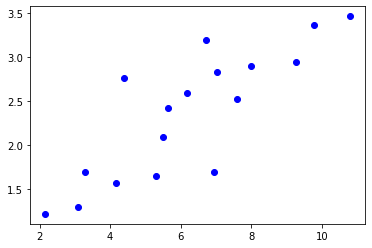

In [5]:
plt.plot(x, y, 'bo')

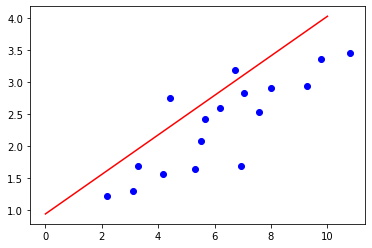

In [6]:
m = np.linspace(0, 10, 100)
n = w.detach().numpy()*m+b.detach().numpy()
plt.plot(x, y, 'bo')
plt.plot(m, n, '-r', label='y=wx+b')

# Example 2

In [7]:
import torch.nn as nn
import torch.optim as optim

In [8]:
linear_model = nn.Linear(1, 1)
linear_model(torch.rand(2, 1))

tensor([[-0.1869],
        [-0.2917]], grad_fn=<AddmmBackward>)

In [9]:
linear_model.weight

Parameter containing:
tensor([[-0.4865]], requires_grad=True)

In [10]:
linear_model.bias

Parameter containing:
tensor([-0.0037], requires_grad=True)

In [11]:
x = torch.ones(1)
linear_model(x)

tensor([-0.4902], grad_fn=<AddBackward0>)

In [12]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-0.4902],
        [-0.4902],
        [-0.4902],
        [-0.4902],
        [-0.4902],
        [-0.4902],
        [-0.4902],
        [-0.4902],
        [-0.4902],
        [-0.4902]], grad_fn=<AddmmBackward>)

In [13]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

t_u.shape

torch.Size([11, 1])

In [14]:
t_un = 0.1 * t_u

t_un_train = t_un[0:7]
t_un_val = t_un[7:11]
t_c_train = t_c[0:7]
t_c_val = t_c[7:11]

In [15]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr=1e-2)

In [16]:
linear_model.parameters()

<generator object Module.parameters at 0x000002094D7FFAC0>

In [17]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.9178]], requires_grad=True),
 Parameter containing:
 tensor([0.3348], requires_grad=True)]

In [18]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs+1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f'Epoch {epoch}, Training loss {loss_train.item():.4f},')
            print(f' Validation loss {loss_val.item():.4f}')

In [19]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr=1e-2)

print(linear_model.weight)
print(linear_model.bias)
print()

training_loop(
    n_epochs=3000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val
)

print()
print(linear_model.weight)
print(linear_model.bias)

Parameter containing:
tensor([[0.6892]], requires_grad=True)
Parameter containing:
tensor([0.9340], requires_grad=True)

Epoch 1, Training loss 100.7495,
 Validation loss 85.6416
Epoch 1000, Training loss 3.6476,
 Validation loss 5.5094
Epoch 2000, Training loss 2.1713,
 Validation loss 4.5128
Epoch 3000, Training loss 2.0869,
 Validation loss 4.6826

Parameter containing:
tensor([[5.5068]], requires_grad=True)
Parameter containing:
tensor([-17.7944], requires_grad=True)


# Q: What is the second example equation?
# A: It is a linear equation. 5.5068*X - 17.7944 which X is normalized by multiple 0.1

# Using 2 layers model

In [20]:
seg_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1))

optimizer = optim.SGD(
    seg_model.parameters(),
    lr=1e-2)

In [21]:
training_loop(
    n_epochs=10000,
    optimizer=optimizer,
    model=seg_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val
)

Epoch 1, Training loss 195.3639,
 Validation loss 161.7141
Epoch 1000, Training loss 15.0079,
 Validation loss 13.5719
Epoch 2000, Training loss 2.4748,
 Validation loss 18.5192
Epoch 3000, Training loss 1.5751,
 Validation loss 16.3282
Epoch 4000, Training loss 1.5788,
 Validation loss 20.9819
Epoch 5000, Training loss 1.5491,
 Validation loss 21.2575
Epoch 6000, Training loss 1.5251,
 Validation loss 21.4834
Epoch 7000, Training loss 1.5052,
 Validation loss 21.7083
Epoch 8000, Training loss 1.4884,
 Validation loss 21.9310
Epoch 9000, Training loss 1.4740,
 Validation loss 22.1504
Epoch 10000, Training loss 1.4614,
 Validation loss 22.3657


# When using 2 layers model, the model is overfitting to training set.